<a href="https://colab.research.google.com/github/Arunimad/CCIR_Quantum-mechanics-and-Photoluminescence/blob/main/TA8_LinearRegression(advertising_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Simple Linear Regression


A straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of –5 (see the following figure):

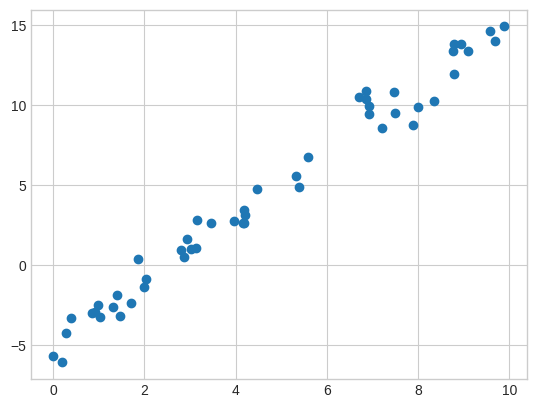

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

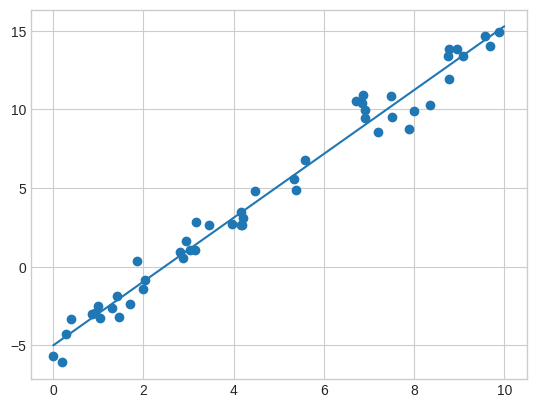

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


Can be extended to polynomial

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Using pipeline for higher dimensional data
(7th-degree polynomial model)

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

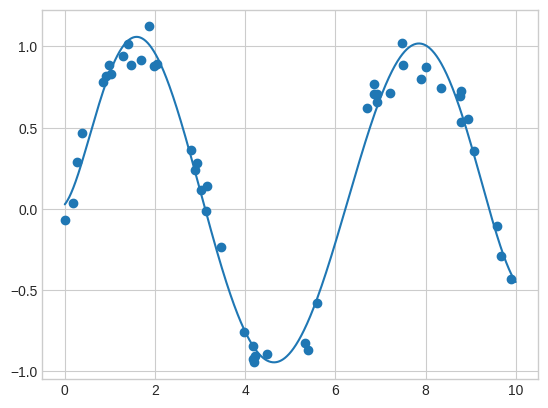

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Even a Gaussian model

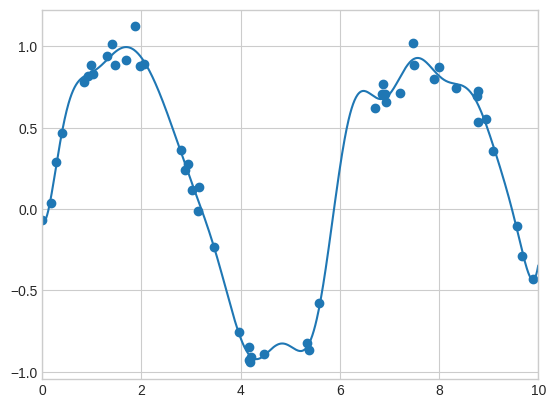

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

**Now - Lets try to understand a bit more of Regresion (This time without Scikit learn)**

In [10]:
#importing required Library

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#model building Library

import statsmodels

import statsmodels.api as sm

import sklearn

from sklearn.model_selection import train_test_split

In [11]:
adv=pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_Quantum-mechanics-and-Photoluminescence/main/datasets/advertising.csv')

In [12]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
adv.shape

(200, 4)

In [14]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

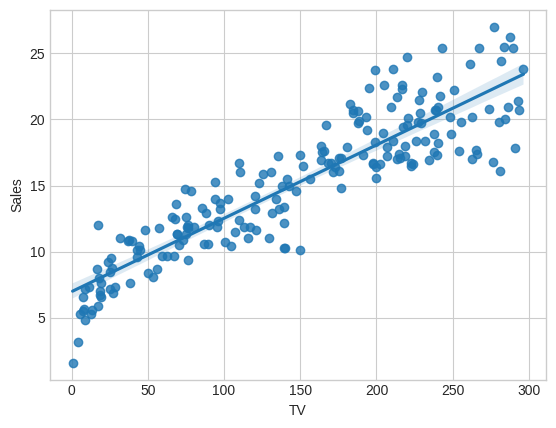

In [16]:
sns.regplot(x='TV', y='Sales', data=adv)

<Axes: xlabel='Radio', ylabel='Sales'>

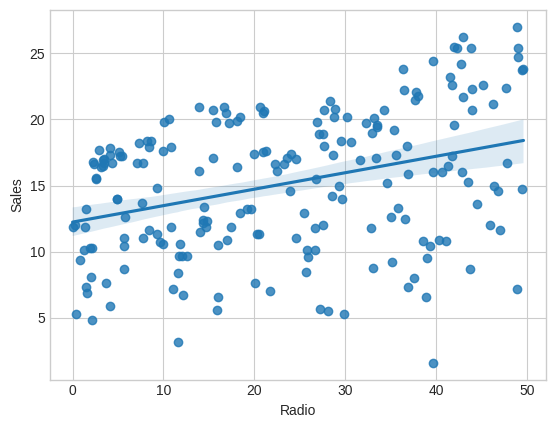

In [17]:
sns.regplot(x='Radio', y='Sales', data=adv)

<Axes: xlabel='Newspaper', ylabel='Sales'>

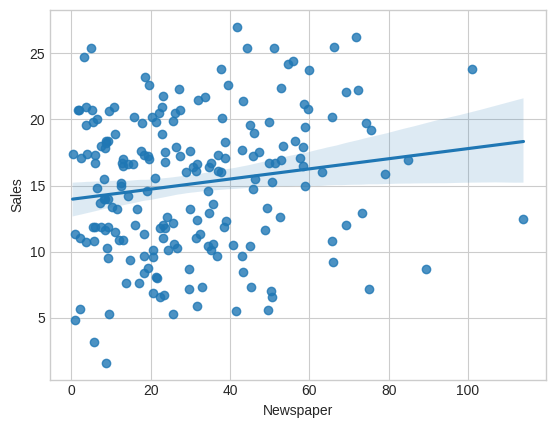

In [18]:
sns.regplot(x='Newspaper', y='Sales', data=adv)

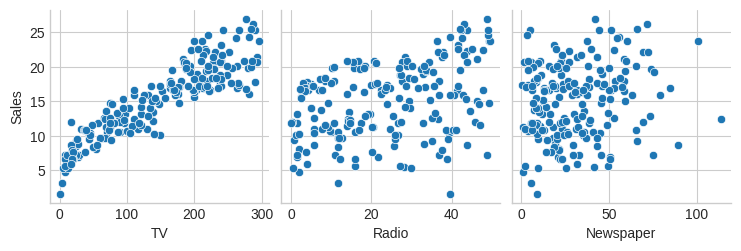

In [19]:
sns.pairplot(data=adv, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [20]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

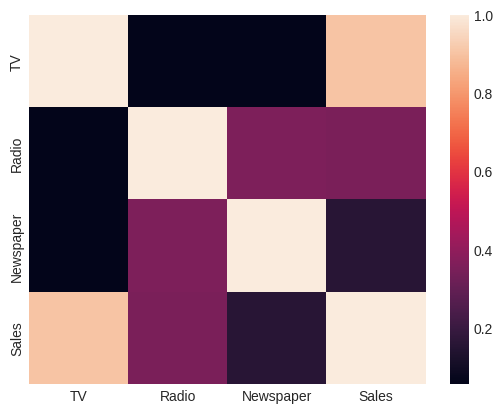

In [21]:
sns.heatmap(adv.corr())

<Axes: >

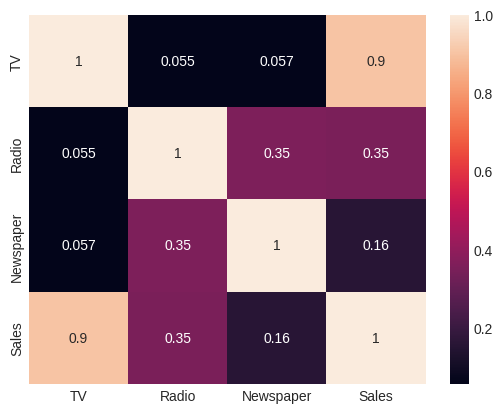

In [22]:
sns.heatmap(adv.corr(), annot=True)

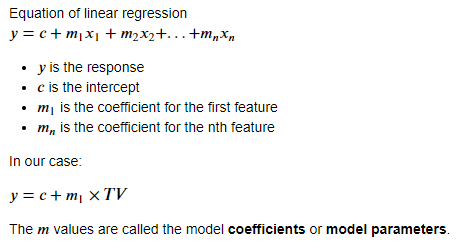


Model Building
Steps:


Create X and y

Create Train and Test sets(70-30, 80-20)

Training the model on training set (i.e. learn the coefficient)

Evaluate the model ( Training set, test set)

1. Create X and y

In [23]:
X=adv['TV']

y=adv['Sales']

2. Create Train and Test sets(70-30, 80-20)

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.80, random_state=100)

3.Training the model on training set (i.e. learn the coefficient) Using StatsModels

Training

In [25]:
#fitting the model

lr=sm.OLS(y_train, X_train)

lr_model=lr.fit()

lr_model.params

,0
TV,0.088758


In [ ]:
lr_model.summary()

OLS or Ordinary Least Squares is a useful method for evaluating a linear regression model.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels .

Looking at some key statistics from the summary

The values we are concerned with are -

The coefficients and significance (p-values)

R-squared

F statistic and its significance

1. The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

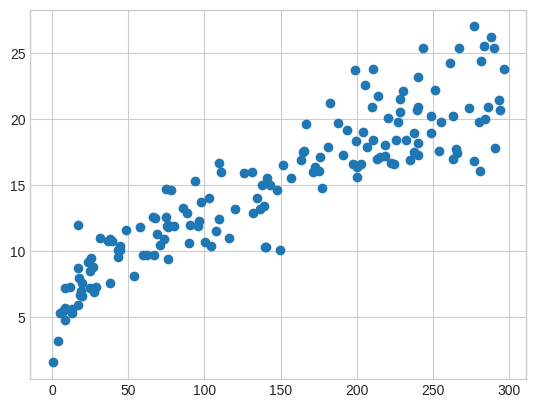

In [26]:
plt.scatter(X_train, y_train)

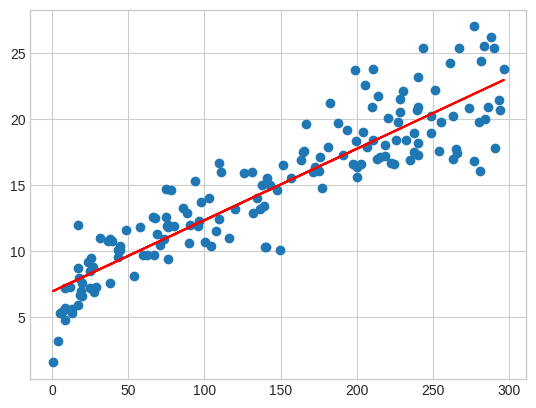

In [27]:
plt.scatter(X_train, y_train)

plt.plot(X_train, 6.948+0.054*X_train,'r')

plt.show()

In [28]:
lr_model.predict(500)

array([44.3788556])

RESIDUAL ANALYSIS

To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [29]:
# error=f(y_train, y_train_pred)

y_train_pred=lr_model.predict(y_train)

In [30]:
y_train_pred

,0
168,1.517757
112,1.517757
171,1.553260
181,1.526633
7,1.171602
...,...
87,1.420123
103,1.748527
67,1.189353
24,0.860950


In [31]:
residual=y_train-y_train_pred

residual

,0
168,15.582243
112,15.582243
171,15.946740
181,15.673367
7,12.028398
...,...
87,14.579877
103,17.951473
67,12.210647
24,8.839050


Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

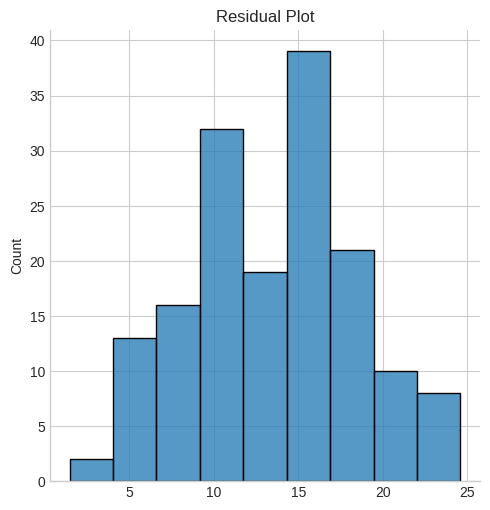

In [32]:
plt.figure()

sns.displot(residual)

plt.title("Residual Plot")

The residuals are following the normally distributed with a mean 0. All good!

In [ ]:
#Plotting residuals

plt.scatter(X_train, residual)

plt.show()

We can see that residuals are equally distributed which is quite good for the model.

Prediction and Evaluation of Model on Test Dataset

In [ ]:

# Predict the y values corresponding to X_test_sm

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

#RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)

r_squared

In [ ]:
plt.scatter(X_test, y_test)

plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')

plt.show()

In [ ]:
y_pred = lr_model.predict(10)
print(y_pred)



**Lines of interest! (Shortened version)**

In [ ]:
adv=pd.read_csv('https://raw.githubusercontent.com/Arunimaddvertising.csv')

In [ ]:
X=adv['TV']

y=adv['Sales']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.80, random_state=100)

In [ ]:
#fitting the model

lr=sm.OLS(y_train, X_train)

lr_model=lr.fit()



In [ ]:
lr_model.predict(1000)

In [ ]:
lr_model.summary()

In [ ]:
y_pred=lr_model.predict(y_test)
y_pred

In [ ]:
# just some metrics to confirm our model accuracy | not mandatory

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

#RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

r_squared = r2_score(y_test, y_pred)

r_squared

**penguins *questions***

Use the lines below as a template for penguins.csv assignment.

Questions
1. What is the ideal body mass given a penguin of bill length 40 mm
2. What is the ideal body mass given a penguin of bill depth 20 mm

Advanced question.
- What is the ideal body mass given a penguin of bill length 40 mm and bill depth 20 mm


-------
For better understanding,

Try to use some more lines from the above (other than the shortened lines), in which you can see more pair plots and more details of the dataset you are handling. It is also advisable that you try to do more residual and accuracy measurements......